In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import keras

img_size = (224, 224)  
batch_size = 32
#Splitting the dataset into training and validation sets so we can see how well the models are trained
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../train_val_dataset_2",
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary',  
    validation_split=0.2,
    subset="training",
    seed=42
    
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../train_val_dataset_2",
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary',
    validation_split=0.2,
    subset="validation",
    seed=42
)

#0 = jack | 1 = not jack


Found 7509 files belonging to 2 classes.
Using 6008 files for training.
Found 7509 files belonging to 2 classes.
Using 1501 files for validation.


In [2]:
#Assign a certain amount of constant for tuning depending on how much the CPU/GPU can handle so we dont overload it, which could make it slow
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [3]:
data_augmentation =[
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
]

def data_augmentation_func(image):
    for layer in data_augmentation:
        image = layer(image)
    return image
    

train_ds = train_ds.map(lambda x, y: (data_augmentation_func(x), y))

#Use the sequential model on the dataset where we rescale the images and process it through convolutional layers and max pooling to reduce the dimensions of the picture
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

c:\Users\Bao Anh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
#Compile and train the model

model.compile(
    optimizer=keras.optimizers.Adam(0.0003),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 133s 696ms/step - binary_accuracy: 0.8799 - loss: 0.3478 - val_binary_accuracy: 0.9247 - val_loss: 0.2296
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 121s 643ms/step - binary_accuracy: 0.9078 - loss: 0.2287 - val_binary_accuracy: 0.9260 - val_loss: 0.2058
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 119s 631ms/step - binary_accuracy: 0.9172 - loss: 0.2176 - val_binary_accuracy: 0.9394 - val_loss: 0.1823
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 120s 638ms/step - binary_accuracy: 0.9269 - loss: 0.2011 - val_binary_accuracy: 0.9440 - val_loss: 0.1895
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 120s 639ms/step - binary_accuracy: 0.9269 - loss: 0.1996 - val_binary_accuracy: 0.9454 - val_loss: 0.1709
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 119s 633ms/step - binary_accuracy: 0.9288 - loss: 0.1934 - val_binary_accuracy: 0.9467 - val_loss: 0.1790
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 121s 642ms/step - binary_accuracy: 0.9299 - loss: 0.1859 - val_binary_accuracy: 0.94

In [ ]:
model.save('./new_cnn_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
This image is 26.90% jack and 73.10% not jack.
The binary score is : 1.0


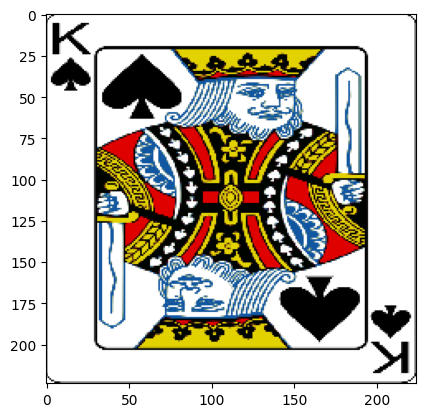

In [8]:
import keras
import matplotlib.pyplot as plt
img = keras.utils.load_img("king_of_spades.png", target_size=(224, 224))
plt.imshow(img)

#Taken as a example from keras documentation page "Image classfication from scratch"
img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
sigmoid_score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - sigmoid_score):.2f}% jack and {100 * sigmoid_score:.2f}% not jack.")
binary_score =  float(round(predictions[0][0]))
print("The binary score is :", binary_score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This image is 49.41% jack and 50.59% not jack.
The binary score is : 0.0


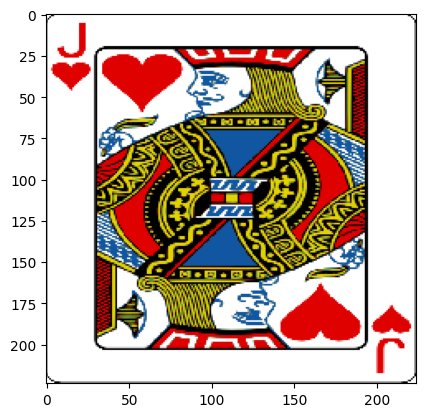

In [10]:
import keras
import matplotlib.pyplot as plt
img = keras.utils.load_img("jack_of_hearts.png", target_size=(224, 224))
plt.imshow(img)

#Taken as a example from keras documentation page "Image classfication from scratch"
img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
sigmoid_score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - sigmoid_score):.2f}% jack and {100 * sigmoid_score:.2f}% not jack.")
binary_score =  float(round(predictions[0][0]))
print("The binary score is :", binary_score)